Implementing Kernel Density Estimation to predict handwrittend digits using the MNIST datset.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.io
import math
from sklearn.metrics import confusion_matrix


%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_mat = scipy.io.loadmat('mnist_train.mat')
train_data = train_mat['images']
train_labels = train_mat['labels']
 
test_mat = scipy.io.loadmat('mnist_test.mat')
test_data = test_mat['t10k_images']
test_labels = test_mat['t10k_labels']

## Digit Print

In [3]:
zero_list = []
one_list = []
two_list = []
three_list = []
four_list = []
five_list = []
six_list = []
seven_list = []
eight_list = []
nine_list = []

for i in range(0, 60000):
    if train_labels[i] == 0:
        zero_list.append(i)
    elif train_labels[i] ==1:
        one_list.append(i)
    elif train_labels[i] ==2:
        two_list.append(i)
    elif train_labels[i] ==3:
        three_list.append(i)
    elif train_labels[i] ==4:
        four_list.append(i)
    elif train_labels[i] ==5:
        five_list.append(i)
    elif train_labels[i] ==6:
        six_list.append(i)
    elif train_labels[i] ==7:
        seven_list.append(i)
    elif train_labels[i] ==8:
        eight_list.append(i)
    elif train_labels[i] ==9:
        nine_list.append(i)
        
big_list = []
big_list = (zero_list, one_list, two_list, three_list, four_list, five_list, six_list, seven_list, eight_list,
               nine_list)

zero_array = np.array(np.column_stack(train_data[:,zero_list]))
one_array = np.array(np.column_stack(train_data[:,one_list]))
two_array = np.array(np.column_stack(train_data[:,two_list]))
three_array = np.array(np.column_stack(train_data[:,three_list]))
four_array = np.array(np.column_stack(train_data[:,four_list]))
five_array = np.array(np.column_stack(train_data[:, five_list]))
six_array = np.array(np.column_stack(train_data[:, six_list]))
seven_array = np.array(np.column_stack(train_data[:,seven_list]))
eight_array = np.array(np.column_stack(train_data[:,eight_list]))
nine_array = np.array(np.column_stack(train_data[:,nine_list]))

zero_avg = np.ones(784)
one_avg = np.ones(784)
two_avg = np.ones(784)
three_avg = np.ones(784)
four_avg = np.ones(784)
five_avg = np.ones(784)
six_avg = np.ones(784)
seven_avg = np.ones(784)
eight_avg = np.ones(784)
nine_avg = np.ones(784)

for i in range(0, 784):
    zero_avg[i] = zero_array[:,i].mean()
    one_avg[i] = one_array[:,i].mean()
    two_avg[i] = two_array[:,i].mean()
    three_avg[i] = three_array[:,i].mean()
    four_avg[i] = four_array[:,i].mean()
    five_avg[i] = five_array[:,i].mean()
    six_avg[i] = six_array[:,i].mean()
    seven_avg[i] = seven_array[:,i].mean()
    eight_avg[i] = eight_array[:,i].mean()
    nine_avg[i] = nine_array[:,i].mean()
avg = np.array(np.column_stack((zero_avg, one_avg, two_avg, three_avg, four_avg, five_avg, six_avg,
                                     seven_avg, eight_avg, nine_avg)))

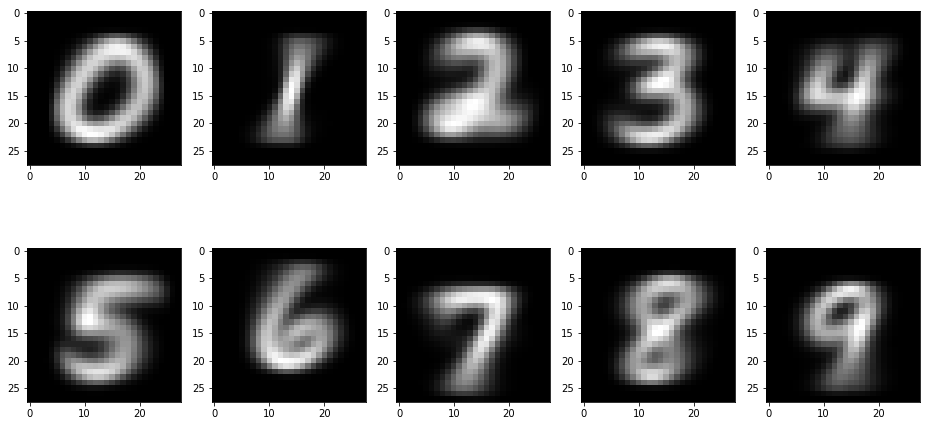

In [4]:
im0 = plt.subplot(251)
im1 = plt.subplot(252)
im2 = plt.subplot(253)
im3 = plt.subplot(254)
im4 = plt.subplot(255)
im5 = plt.subplot(256)
im6 = plt.subplot(257)
im7 = plt.subplot(258)
im8 = plt.subplot(259)
im9 = plt.subplot(2,5,10)

im0.imshow(avg[:,0].reshape(28,28).T, interpolation='nearest', cmap="gray")
im1.imshow(avg[:,1].reshape(28,28).T, interpolation='nearest', cmap="gray")
im2.imshow(avg[:,2].reshape(28,28).T, interpolation='nearest', cmap="gray")
im3.imshow(avg[:,3].reshape(28,28).T, interpolation='nearest', cmap="gray")
im4.imshow(avg[:,4].reshape(28,28).T, interpolation='nearest', cmap="gray")
im5.imshow(avg[:,5].reshape(28,28).T, interpolation='nearest', cmap="gray")
im6.imshow(avg[:,6].reshape(28,28).T, interpolation='nearest', cmap="gray")
im7.imshow(avg[:,7].reshape(28,28).T, interpolation='nearest', cmap="gray")
im8.imshow(avg[:,8].reshape(28,28).T, interpolation='nearest', cmap="gray")
im9.imshow(avg[:,9].reshape(28,28).T, interpolation='nearest', cmap="gray")
plt.show()

## Median Kernal Estimator

In [5]:
correct_check = 0

digit_prob = np.ones((10, len(test_labels)))
results = np.ones(len(test_labels))
sigma = np.eye(784)
for i in range(0, 10):
    diff = avg[:,[i]] - test_data
    prob = (2*pi**(-784/2))*np.exp(-.5*np.sum(diff*np.dot(sigma, diff), axis=0, keepdims=True))/784
    digit_prob[i] = prob

for i in range(0, len(test_labels)):
    results[i] = digit_prob[:,i].argmax()
    
for i in range(0, len(test_labels)):
    if results[i] == test_labels[i]:
         correct_check = correct_check+1
        
error_percent = (1-correct_check/len(test_labels))*100
print ("Error Percentage: %", error_percent)

Error Percentage: % 17.97


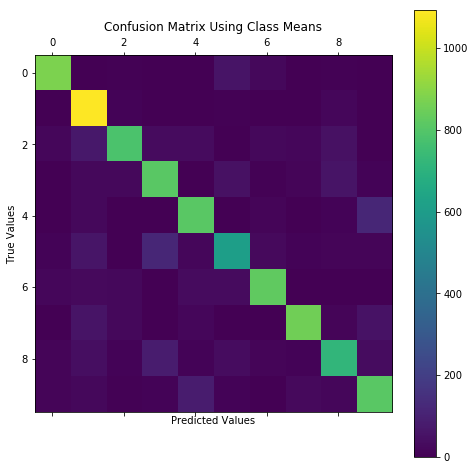

In [6]:
y_true = test_labels
y_pred = results
M = confusion_matrix(y_true, y_pred)
plt.matshow(M)
plt.colorbar()
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title("Confusion Matrix Using Class Means")

## Full Kernal Density Estimator

In [7]:
correct_check = 0
anomaly_detection = np.ones(1000)
digit_prob = np.ones((1000,10))
results = np.zeros(1000)
sigma = np.eye(1000)

for i in range(0, 10):
    first = np.sum(test_data[:,0:1000]*test_data[:,0:1000], axis = 0, keepdims = True)
    second = np.sum(train_data[:,big_list[i]]*train_data[:,big_list[i]], axis = 0, keepdims = True)
    middle = -2*test_data[:,0:1000].T.dot(train_data[:,big_list[i]])
    prob = ((2*pi**(-784/2))*np.exp(-.5*(first.T+middle+second)))
    prob = np.sum(prob, axis = 1, keepdims = True)/len(big_list[i])
    digit_prob[:,[i]] = prob
    
for i in range(0,1000):
    results[i] = digit_prob[i].argmax()
    anomaly_detection[i] = prob[i,prob[i].argmax()]
    if results[i] == test_labels[i]:
         correct_check = correct_check+1
        
error_percent = (1-correct_check/1000)*100
print ("Error Percentage: %", error_percent)


Error Percentage: % 4.0000000000000036


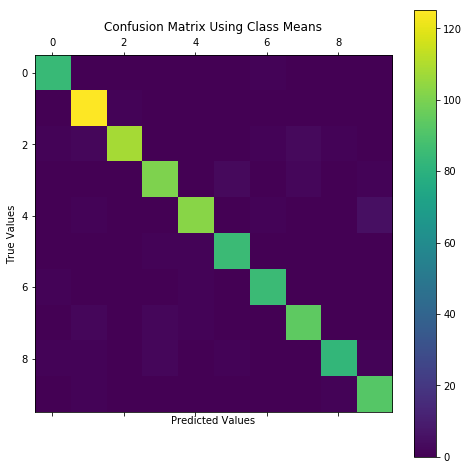

In [8]:
y_true = test_labels[0:1000,:]
y_pred = results
M = confusion_matrix(y_true, y_pred)
plt.matshow(M)
plt.colorbar()
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title("Confusion Matrix Using Class Means")

## Anamoly Detection

The anomaly is in the test data at position 151


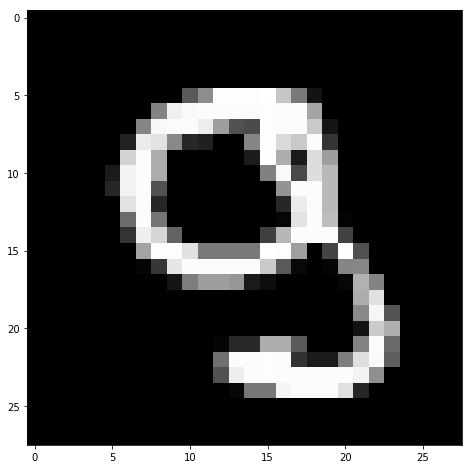

In [9]:
correct_check = 0
anomaly_detection = np.ones(1000)
digit_prob = np.ones((1000,10))
results = np.zeros(1000)
sigma = np.eye(1000)


first = np.sum(test_data[:,0:1000]*test_data[:,0:1000], axis = 0, keepdims = True)
second = np.sum(train_data*train_data, axis = 0, keepdims = True)
middle = -2*test_data[:,0:1000].T.dot(train_data)
prob = ((2*pi**(-784/2))*np.exp(-.5*(first.T+middle+second)))
prob = np.sum(prob, axis = 1, keepdims = True)/len(train_labels)
    
for i in range(0,1000):
    results[i] = prob[i].argmax()
    anomaly_detection[i] = prob[i,prob[i].argmax()]
    
    
anomaly = 0
anomaly = anomaly_detection.argmin()
print("The anomaly is in the test data at position", anomaly)
imshow(test_data[:,anomaly].reshape(28,28).T, interpolation='nearest', cmap="gray")